#Prova 2

## Lista 5

### Exercício 14.

Exercício sobre regressão softmax: Neste exercício, você deve utilizar sua
implementação (não use a implementação do Regressor Softmax da biblioteca
Scikit-Learn) do classificador Softmax utilizando o algoritmo do gradiente descendente
em batelada com early-stopping para classificar os dados pertencentes a 6 classes
diferentes. Utilize o conjunto de dados contido no arquivo circles_plus_two_moons.csv
(baixe o arquivo e utilize seu conteúdo) para realizar o treinamento e a validação do
classificador. Em seguida, pede-se


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


Itens A e B

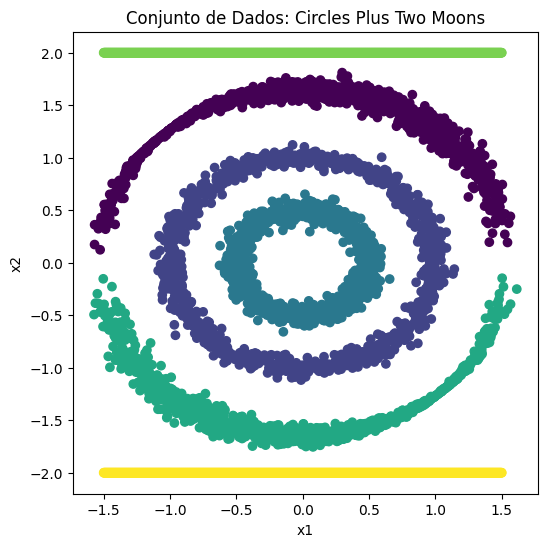

In [22]:
data = pd.read_csv('circles_plus_two_moons.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Conjunto de Dados: Circles Plus Two Moons")
plt.show()


In [24]:
def to_one_hot(y, n_classes):
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7  # Para evitar log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))


In [26]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, max_iter=2000, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.train_accuracies = []  # Para armazenar acurácias de treinamento
        self.val_accuracies = []    # Para armazenar acurácias de validação
        self.errors = []            # Para armazenar erros de treinamento

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)
        y_one_hot = to_one_hot(y, n_classes)

        for epoch in range(self.max_iter):
            # Modelo linear e cálculo do Softmax
            logits = np.dot(X, self.weights) + self.bias
            y_pred = softmax(logits)

            # Calculando o gradiente
            error = y_pred - y_one_hot
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error, axis=0)

            # Atualizando pesos e bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Cálculo do erro e registro
            loss = cross_entropy_loss(y_one_hot, y_pred)
            self.errors.append(loss)

            # Cálculo de acurácias
            y_train_pred = self.predict(X)
            train_accuracy = accuracy_score(y, y_train_pred)
            self.train_accuracies.append(train_accuracy)

            if X_val is not None and y_val is not None:
                y_val_pred = self.predict(X_val)
                val_accuracy = accuracy_score(y_val, y_val_pred)
                self.val_accuracies.append(val_accuracy)

            # Early stopping
            if epoch > 0 and abs(self.errors[-1] - self.errors[-2]) < self.tolerance:
                print(f"Converged at epoch {epoch}")
                break

    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        y_pred = softmax(logits)
        return np.argmax(y_pred, axis=1)

Item C

In [27]:
best_degree = None
best_accuracy = 0
train_errors = []
val_errors = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)

    model = SoftmaxRegression(learning_rate=0.01, max_iter=2000, tolerance=1e-4)
    model.fit(X_train_poly, y_train)

    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_test)

    train_errors.append(1 - train_accuracy)
    val_errors.append(1 - val_accuracy)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_degree = degree

print(f"Melhor grau de polinômio: {best_degree} com acurácia de validação: {best_accuracy:.2f}")


Converged at epoch 1733
Converged at epoch 1936
Converged at epoch 1862
Converged at epoch 1733
Converged at epoch 1697
Converged at epoch 1616
Converged at epoch 1596
Converged at epoch 1541
Melhor grau de polinômio: 8 com acurácia de validação: 0.93


Item D

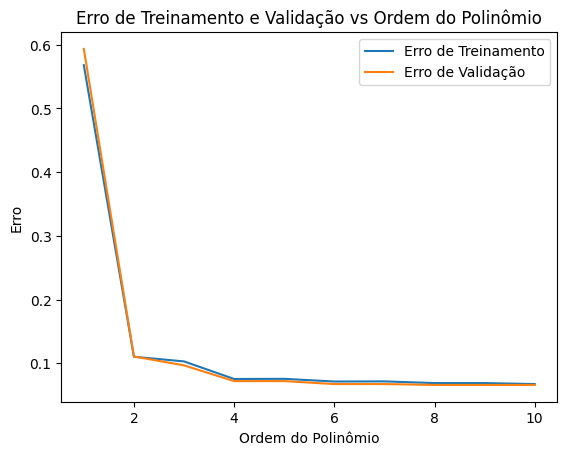

In [28]:
plt.plot(range(1, 11), train_errors, label='Erro de Treinamento')
plt.plot(range(1, 11), val_errors, label='Erro de Validação')
plt.xlabel("Ordem do Polinômio")
plt.ylabel("Erro")
plt.title("Erro de Treinamento e Validação vs Ordem do Polinômio")
plt.legend()
plt.show()


Item E

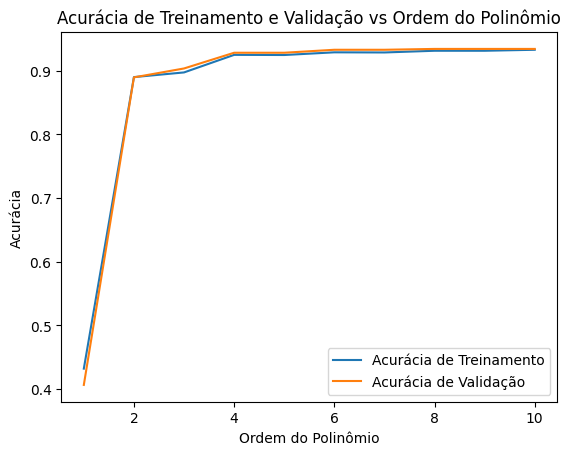

In [29]:
train_accuracies = [1 - e for e in train_errors]
val_accuracies = [1 - e for e in val_errors]

plt.plot(range(1, 11), train_accuracies, label='Acurácia de Treinamento')
plt.plot(range(1, 11), val_accuracies, label='Acurácia de Validação')
plt.xlabel("Ordem do Polinômio")
plt.ylabel("Acurácia")
plt.title("Acurácia de Treinamento e Validação vs Ordem do Polinômio")
plt.legend()
plt.show()


Item F

Converged at epoch 1616
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      0.60      0.75       248
           2       0.72      1.00      0.84       252
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       243
           5       1.00      1.00      1.00       233

    accuracy                           0.93      1500
   macro avg       0.95      0.93      0.93      1500
weighted avg       0.95      0.93      0.93      1500



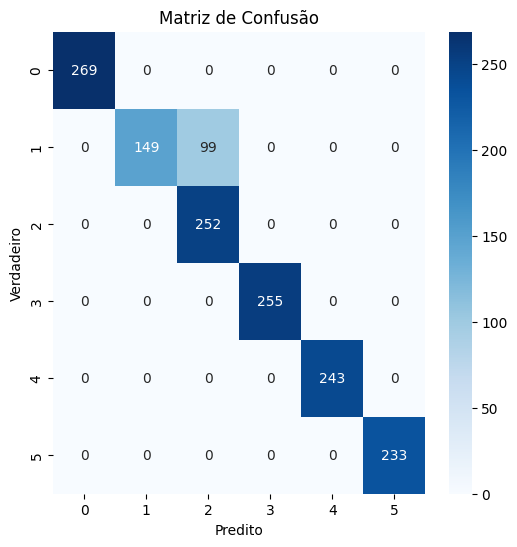

In [30]:
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

model = SoftmaxRegression(learning_rate=0.01, max_iter=2000, tolerance=1e-4)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


In [11]:
learning_rates = [0.01, 0.05, 0.1]
max_epochs = 50000

for lr in learning_rates:
    model = SoftmaxRegression(learning_rate=lr, max_iter=max_epochs, tolerance=1e-4)
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_test)

    if train_accuracy == 1.0 and val_accuracy == 1.0:
        print(f"Acurácia de 100% alcançada com taxa de aprendizado {lr}")
        break


Converged at epoch 1616
Converged at epoch 935
Converged at epoch 771


Item G e H

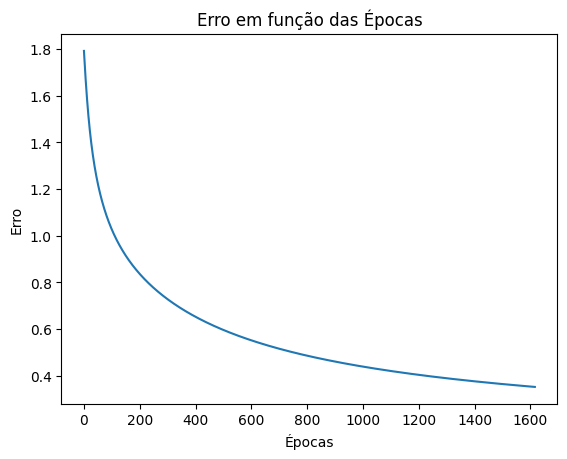

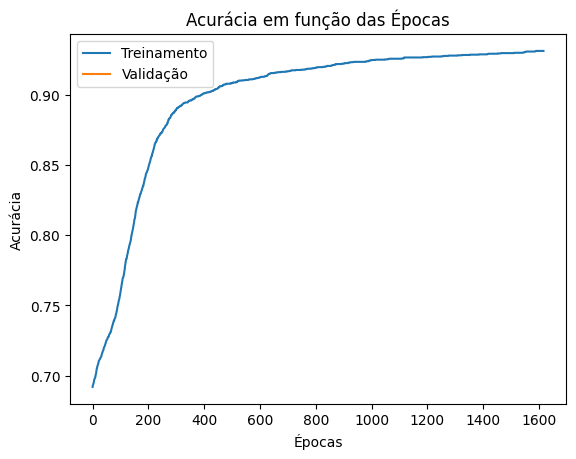

In [31]:
plt.plot(range(len(model.errors)), model.errors, label="Erro")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.title("Erro em função das Épocas")
plt.show()

plt.plot(range(len(model.train_accuracies)), model.train_accuracies, label="Treinamento")
plt.plot(range(len(model.val_accuracies)), model.val_accuracies, label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.title("Acurácia em função das Épocas")
plt.legend()
plt.show()


Item I

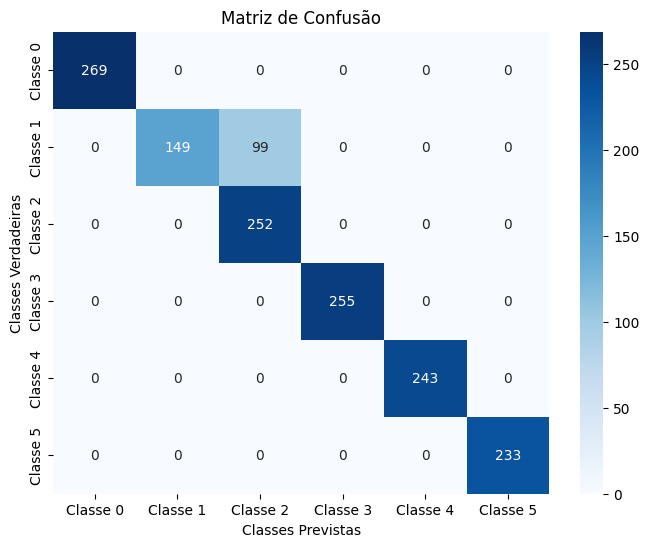

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_poly)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Classe {i}" for i in range(len(np.unique(y_test)))], yticklabels=[f"Classe {i}" for i in range(len(np.unique(y_test)))])
plt.xlabel("Classes Previstas")
plt.ylabel("Classes Verdadeiras")
plt.title("Matriz de Confusão")
plt.show()


Item J

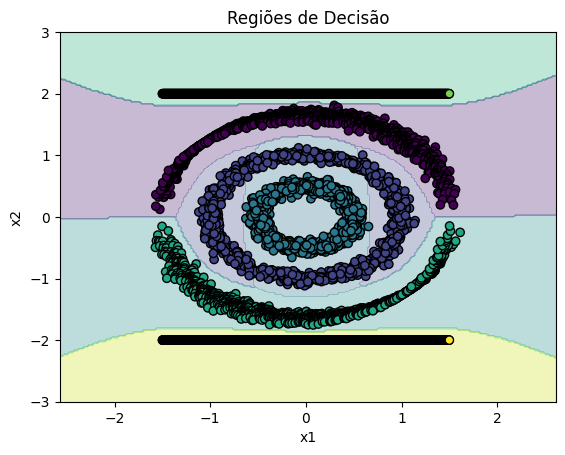

In [33]:
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)
grid_poly = scaler.transform(grid_poly)
predictions = model.predict(grid_poly)
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Regiões de Decisão")
plt.show()

Item K

In [34]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_poly)

report = classification_report(y_test, y_pred, target_names=[f"Classe {i}" for i in range(len(np.unique(y_test)))])
print("Relatório de Classificação:")
print(report)


Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       1.00      1.00      1.00       269
    Classe 1       1.00      0.60      0.75       248
    Classe 2       0.72      1.00      0.84       252
    Classe 3       1.00      1.00      1.00       255
    Classe 4       1.00      1.00      1.00       243
    Classe 5       1.00      1.00      1.00       233

    accuracy                           0.93      1500
   macro avg       0.95      0.93      0.93      1500
weighted avg       0.95      0.93      0.93      1500

